# Описание проекта **Исследование надёжности заёмщиков**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования могут быть использованы для кредитного скоринга.

# Изучу общую информацию о данных

In [1]:
!pip install pymystem3

In [2]:
# чтобы в блокноте печатался каждый вывод, импортирую:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd # импортирую pandas
import numpy as np # импорт Numpy
# чтобы визуально оценить распределение, испортирую библиотеки и Matplotlib:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pymystem3 import Mystem

In [4]:
data = pd.read_csv('data.csv') # открываю файл

Выведу общую информацию о данных:

In [5]:
data.info()
data.columns
data.shape
data.dtypes
data.isnull().sum()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

(21525, 12)

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Вывод**  
В данных есть пропущенные значения (столбцы days_employed и total_income - они же представлены в не очень удобном виде float), похоже это неработающие люди с отсутствующим доходом.
Есть много дубликатов в уровне образования. Цели заявки очень по-разному описаны

# Предобработка данных

## Обработка пропусков

In [6]:
data.isna().sum() # считаю отсутствующие даннных по столбцам

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [8]:
# выведу по очереди каждый столбец, использую цикл:
for column in data:
    data[column].value_counts().sort_values()

 5         9
 4        41
-1        47
 20       76
 3       330
 2      2055
 1      4818
 0     14149
Name: children, dtype: int64

-8437.673028      1
-926.185831       1
-2879.202052      1
-152.779569       1
-6929.865299      1
                 ..
-79.832064        1
-681.446439       1
-1556.249906      1
 363996.449108    1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64

75      1
74      6
73      8
19     14
72     33
20     51
71     58
70     65
69     85
68     99
0     101
21    111
67    167
66    183
22    183
65    194
23    254
24    264
64    265
63    269
62    352
61    355
25    357
60    377
26    408
55    443
59    444
51    448
53    459
57    460
58    461
46    475
54    479
47    480
52    484
56    487
27    493
45    497
28    503
49    508
32    510
43    513
50    514
37    537
48    538
30    540
29    545
44    547
36    555
31    560
39    573
33    581
42    597
38    598
34    603
41    607
40    609
35    617
Name: dob_years, dtype: int64

Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
ученая степень             4
Начальное                 15
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Неоконченное высшее       47
начальное                250
Высшее                   268
ВЫСШЕЕ                   274
неоконченное высшее      668
Среднее                  711
СРЕДНЕЕ                  772
высшее                  4718
среднее                13750
Name: education, dtype: int64

4        6
3      282
2      744
0     5260
1    15233
Name: education_id, dtype: int64

вдовец / вдова             960
в разводе                 1195
Не женат / не замужем     2813
гражданский брак          4177
женат / замужем          12380
Name: family_status, dtype: int64

2      960
3     1195
4     2813
1     4177
0    12380
Name: family_status_id, dtype: int64

XNA        1
M       7288
F      14236
Name: gender, dtype: int64

студент                1
в декрете              1
безработный            2
предприниматель        2
госслужащий         1459
пенсионер           3856
компаньон           5085
сотрудник          11119
Name: income_type, dtype: int64

1     1741
0    19784
Name: debt, dtype: int64

253875.639453    1
255763.565419    1
240525.971920    1
135823.934197    1
95856.832424     1
                ..
98180.279152     1
221493.685593    1
145541.993320    1
267000.734155    1
82047.418899     1
Name: total_income, Length: 19351, dtype: int64

заняться образованием                     412
получение высшего образования             426
профильное образование                    436
получение образования                     443
получение дополнительного образования     447
образование                               447
высшее образование                        453
сделка с автомобилем                      455
приобретение автомобиля                   462
дополнительное образование                462
на покупку автомобиля                     472
автомобили                                478
на покупку подержанного автомобиля        479
свой автомобиль                           480
сделка с подержанным автомобилем          489
автомобиль                                495
заняться высшим образованием              496
на покупку своего автомобиля              505
покупка жилой недвижимости                607
ремонт жилью                              612
строительство недвижимости                620
покупка своего жилья              

Есть несколько проблем во многих столбцах, разберёмся с ними по порядку.

In [9]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Количество детей не может быть отрицательным или слишком большим.  
44 анкеты с количеством детей -1. Посмотрим на несколько таких анкет:

In [10]:
data[data['children'] == -1].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,NaN,57,Среднее,1,женат / замужем,0,F,пенсионер,0,NaN,на покупку своего автомобиля


Похоже на опечатку или ошибку в чтении данных (если анкеты рукописные), так что можем заменить значения "-1" на "1":

In [11]:
# заменю все значения "-1" на положительную "1", используя метод замены replace():
data['children'] = data['children'].replace(-1, int(1))

In [12]:
# проверю
data['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

Отлично, кроме этого есть 67 респондентов с 20-ю детьми, что врядли является фактом.
Предположу, что так же опечатка и на самом деле у этих людей по 2 ребёнка. Проведу аналогичную замену "20" на "2":

In [13]:
# аналогично заменю "20" на "2" - это похоже на правду:
data['children'] = data['children'].replace(20, 2)
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Есть некорректные для анализа данные в `days_employed` и сам формат данных не очевидный для анализа: есть отрицательные и очень большие значения.  
Моя гипотеза в том, что стаж в части строк указан в часах, а отрицательные значения обзавелись минусом случайно. Переведу отрицательные значения в положительные:

In [14]:
data['days_employed'] = abs(data['days_employed'])
data['days_employed'].head()

0      8437.673028
1      4024.803754
2      5623.422610
3      4124.747207
4    340266.072047
Name: days_employed, dtype: float64

In [15]:
list_of_days = data[['days_employed', 'dob_years']].sort_values(by = 'dob_years', ascending=False)
# Попробую перевести часы в годы:
list_of_days['days_employed'] = list_of_days['days_employed'] / (24*365)
list_of_days[:3]
# пройду по столбцу с опытом и заменю его 

,days_employed,dob_years
8880,0.191663,75
4895,38.987229,74
2557,42.564053,74


8880     74.808337
4895     35.012771
2557     31.435947
3460     34.659379
12317    73.802553
dtype: float64

опыт (синий) и возраст (жёлтый):


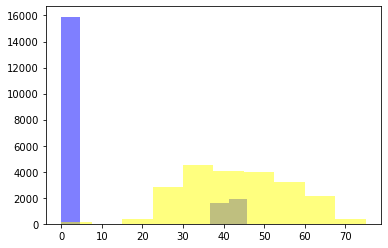

люди без опыта:


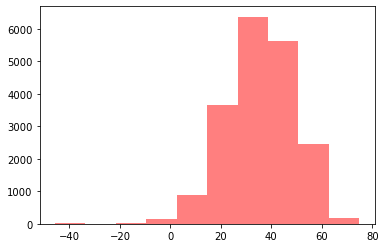

In [16]:
# песочница для экспериментов
diff = list_of_days['dob_years'] - list_of_days['days_employed']
diff.head()

exper = plt.hist(list_of_days['days_employed'], facecolor='blue', alpha=0.5)
age = plt.hist(list_of_days['dob_years'], facecolor='yellow', alpha=0.5)
print('опыт (синий) и возраст (жёлтый):')
plt.show(exper, age)

# похоже не все данные нужно переводить в годы...
wo_exper = plt.hist(diff, facecolor='red', alpha=0.5)
print('люди без опыта:')
plt.show(wo_exper)

In [17]:
data['days_employed'] /= 365
data['days_employed'].head()

0     23.116912
1     11.026860
2     15.406637
3     11.300677
4    932.235814
Name: days_employed, dtype: float64

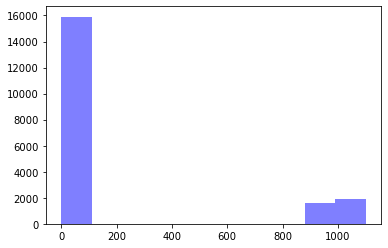

In [18]:
out = plt.hist(data['days_employed'], facecolor='blue', alpha=0.5)
plt.show(out, age)

In [19]:
# ... переведу в дни лишь те, что больше 100:
data.loc[data['days_employed'] > 100, 'days_employed'] /= 24
data['days_employed'].head()

0    23.116912
1    11.026860
2    15.406637
3    11.300677
4    38.843159
Name: days_employed, dtype: float64

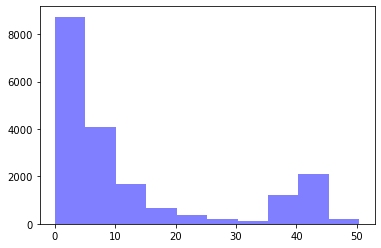

In [20]:
out = plt.hist(data['days_employed'], facecolor='blue', alpha=0.5)
plt.show(out, age) # проверю на гистограмме

In [21]:
data['days_employed'].isna().sum()

2174

Пропуски заполню нулевыми значениями:

In [22]:
data['days_employed'].fillna(0, inplace=True)

In [23]:
data['total_income'].fillna(0, inplace=True)

In [24]:
data['days_employed'] = data['days_employed'].astype('int')

Пожалуй, данный столбец не понядобится нам для формулирования выводов о платёжеспособности, т.к. стаж не является гарантией платежеспособности — любой может быть уволен вне зависимости от стажа.

В информации об образовании много дубликатов, разберёмся с ними немного позже.

В семейном положении всё выглядит нормально, кроме одной большой "Н" - оставлю как есть. Проверю соответствие статуса и id:

In [25]:
status_dict = data[['family_status', 'family_status_id']]
status_dict = status_dict.drop_duplicates().reset_index(drop=True)
status_dict
# оставлю этот словарь для дальнейшего анализа

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


В графе пол есть 1 строка с неопределённым значением `XNA`, удалю её, перезаписаы данные по условию:

In [26]:
data = data[data['gender'] != 'XNA']
data = data.reset_index()

**Вывод**  
В 2-х столбцах есть пропущенные данные. Похоже, это связано с отсутствием работы или официального стажа/дохода и эти значения можно удалить. Но для принятия решения о выдаче кредита данные важны для банка, тогда строки по таким заявкам можно удалить, так как не хватает данных для принятия решения о выдаче кредита.
Есть ряд данных, где значения заполнены некорректно - если их мало, удаляем.

## Замена типа данных

In [27]:
data.dtypes
data['days_employed'] = data['days_employed'].astype(int) # перевожу значения в тип целых чисел, т.к. нам не нужны доли дней для анализа
data['total_income'] = data['total_income'].astype(int) # перевожу доход в целые числа, т.к. не нужны дробные части

index                 int64
children              int64
days_employed         int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [28]:
data.dtypes

index                int64
children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dtype: object

**Вывод**  
У нас были float-значения в 2-х колонка, что визуально затрудняет оценку. Перевёл в целые числа, чтобы в дальнейшем было удобно сравнивать значения.

## Обработка дубликатов

In [29]:
# проверю содержимое столбца с образованием, использую метод value_counts():
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      667
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Дубликатов много, поэтому приведу все символы к нижнему регистру, используя метод для pandas `str.lower()` и проверю, остались ли дубликаты:

In [30]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

Отлично, дубликатов по другим признакам в столбце нет.

**Вывод**  
Исправил дубликаты в образовании через маленький регистр — количество вариаций написания уменшилось с 15 до 5. Больше половины имеет среднее образование, ещё почти четверть — высшее.
Дубликаты полных строк не ищу, т.к. могут быть одинаковые заявки от разных людей.

In [31]:
data.duplicated().sum()

0

<div class="alert alert-info" role="alert">
  На этом этапе у меня нет строк-дубликатов.
</div>

# Лемматизация

Для начала посчитаю количество уникальных значений в столбце `purpose` с помощью метода `calue_counts()`:

In [32]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      623
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

In [33]:
data.head()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


Дубликатов очень много, воспользуюсь лемматизацией. Для этого импортирую библиотеку `pymystem3`:

In [34]:
data['purpose'] = data['purpose'].astype(str)
m = Mystem()
# лемматизирую каждую строку методом apply():
data['lemmas'] = data['purpose'].apply(m.lemmatize)

In [35]:
data.head()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas
0,0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"


**Вывод**  
Цель заявки люди описывают очень по-разному, видимо нет единого шаблона. Но всё крутится вокруг 4-х категорий. В следующем пункте выделю из списка с леммами по ключевому слову.

## Категоризация данных

In [36]:
# напишу функцию, которая будет разделять заявки на категории:

def credit_purpose_status(credit_purpose):
    if 'образование' in credit_purpose:
            return 'Образование'
    if 'свадьба' in credit_purpose:
            return 'Свадьба'
    if 'недвижимость' in credit_purpose:
            return 'Недвижимость'
    if 'жилье' in credit_purpose:
            return 'Недвижимость'
    if 'автомобиль' in credit_purpose:
            return 'Автомобиль'
        
data['category'] = data['lemmas'].apply(credit_purpose_status) # создаю новый столбец с категориями цели заявки и
# применяю к нему метод apply с функцией-категоризатором в аргументе
data.head(5) # вывожу 5 срок результирующей таблицы
data.info() # проверяю, не осталось ли пустых значение в новом столбце с категориями

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,category
0,0,1,23,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",Недвижимость
1,1,1,11,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",Автомобиль
2,2,0,15,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",Недвижимость
3,3,3,11,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",Образование
4,4,0,38,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",Свадьба


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21524 entries, 0 to 21523
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             21524 non-null  int64 
 1   children          21524 non-null  int64 
 2   days_employed     21524 non-null  int64 
 3   dob_years         21524 non-null  int64 
 4   education         21524 non-null  object
 5   education_id      21524 non-null  int64 
 6   family_status     21524 non-null  object
 7   family_status_id  21524 non-null  int64 
 8   gender            21524 non-null  object
 9   income_type       21524 non-null  object
 10  debt              21524 non-null  int64 
 11  total_income      21524 non-null  int64 
 12  purpose           21524 non-null  object
 13  lemmas            21524 non-null  object
 14  category          21524 non-null  object
dtypes: int64(8), object(7)
memory usage: 2.5+ MB


In [37]:
# посмотрим, сколько заявок по категориям получил банк:
data.groupby(by='category')['index'].count()

category
Автомобиль       4315
Недвижимость    10839
Образование      4022
Свадьба          2348
Name: index, dtype: int64

In [38]:
# для набора данных выделил 2 словаря:
status_dict # чтобы не вводить длинные названия семейных статусов при операциях
education_dict = data[['education', 'education_id']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict # аналогично для оценки уровня образования
# так же сделаю категории по возрастам и заведу отдельный словарь для них
def age_func(age):
    if age < 18:
        return 'дети'
    if 18 <= age <35:
        return 'молодежь'
    if 35 <= age <65:
        return 'взрослые'
    if age >= 65:
        return 'пенсионеры'
data['age_group'] = data['dob_years'].apply(age_func) # добавил столбец с категоризацией
data['age_group'].value_counts() # вывел статтистику по возрастным группам методом value_counts()
age_dict = data[['dob_years', 'age_group']] # создал словарь с возрастными группами на всякий случай

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


взрослые      14548
молодежь       5976
пенсионеры      899
дети            101
Name: age_group, dtype: int64

Уберу лишние столбцы из общего массива с purpose, леммами, id-статусом и образованием:

In [39]:
data = data[["children", "days_employed", "dob_years", "age_group", "education_id", "family_status", 
             "gender", "income_type", "debt", "total_income", "category"]]
data.head(5)

,children,days_employed,dob_years,age_group,education_id,family_status,gender,income_type,debt,total_income,category
0,1,23,42,взрослые,0,женат / замужем,F,сотрудник,0,253875,Недвижимость
1,1,11,36,взрослые,1,женат / замужем,F,сотрудник,0,112080,Автомобиль
2,0,15,33,молодежь,1,женат / замужем,M,сотрудник,0,145885,Недвижимость
3,3,11,32,молодежь,1,женат / замужем,M,сотрудник,0,267628,Образование
4,0,38,53,взрослые,1,гражданский брак,F,пенсионер,0,158616,Свадьба


**Вывод**  
Чаще всего подают заявки на кредит взросные люди от 35 до 65 лет. Почти половина заявок поступает под покупку недвижимости — неудивительно, её стоимость значительно больше других категорий.

# Исследование зависимостей

## Зависимость между наличием детей и возвратом кредита в срок.

Посмотрю на группы, для этого создам функции для подсчёта общего количества заёмщиков и среднего значения:

In [40]:
def count(qty):
    return qty.count()
def mean(yorn):
    return yorn.mean()
# ... с через агрегацию посмотрим, есть ли зависимость от количества детей:
data.groupby('children').agg({'category': 'count', 'debt': 'mean'})

,category,debt
children,,
0,14148,0.075134
1,4865,0.091470
2,2131,0.094791
3,330,0.081818
4,41,0.097561
5,9,0.000000


Похоже, что чёткой зависимости нет: при кол-ве детей 1, 2, 4 долги у респондентов встречаются чаще, но менее, чем на 8 процентных пункта нежели у 0 и 3. У тех, кто имеет 5 детей долгов нет совсем, но таких всего 8 человек - не репрезентативная выборка.

## Зависимость между семейным положением и возвратом кредита в срок

Использую тот же метод для группировки по семейному статусу:

In [41]:
data.groupby('family_status').agg({'category': 'count', 'debt': 'mean'})

,category,debt
family_status,,
Не женат / не замужем,2813,0.097405
в разводе,1195,0.071130
вдовец / вдова,960,0.065625
гражданский брак,4176,0.092912
женат / замужем,12380,0.075202


Похоже, **вдовы(-цы)** наиболее надёжные заёмщики. Несколько чаще не возвращают кредит вовремя **разведённые** и те, кто сейчас **в браке**. Те же, кто ещё не успел ощутить прелести брака, чаще других не возвращают займы вовремя - видимо их ответственность ещё не достигла нужного уровня по всем направлениям.

## Зависимость между уровнем дохода и возвратом кредита в срок

Для начала выделю категории дохода:

In [42]:
data['income_group'] = pd.cut(data.loc[:, 'total_income'], 5)
data['income_group'].value_counts(sort=False)
data.groupby('income_group').agg({'income_group': 'count', 'debt': 'mean'})

data['income_group_q'] = pd.qcut(data.loc[:, 'total_income'], 5)
data.groupby('income_group_q').agg({'income_group_q': 'count', 'debt': 'mean'})

(-2265.604, 453120.8]     21201
(453120.8, 906241.6]        293
(906241.6, 1359362.4]        22
(1359362.4, 1812483.2]        6
(1812483.2, 2265604.0]        2
Name: income_group, dtype: int64

,income_group,debt
income_group,,
"(-2265.604, 453120.8]",21201,0.081270
"(453120.8, 906241.6]",293,0.054608
"(906241.6, 1359362.4]",22,0.045455
"(1359362.4, 1812483.2]",6,0.000000
"(1812483.2, 2265604.0]",2,0.500000


,income_group_q,debt
income_group_q,,
"(-0.001, 78559.0]",4305,0.075726
"(78559.0, 116005.8]",4305,0.085250
"(116005.8, 156170.6]",4304,0.086664
"(156170.6, 214255.8]",4305,0.086411
"(214255.8, 2265604.0]",4305,0.070383


Чёткой зависимости нет, все примерно одинаково плохо возвращают кредиты. Правда есть небольшая позитивная статистика у самых малообеспеченных и богатых 20% выборки.

## Зависимость между возрастными категориями и возвратом кредита в срок

In [43]:
data.groupby('age_group').agg({'category': 'count', 'debt': 'mean'}).sort_values(by='debt', ascending=False)

,category,debt
age_group,,
молодежь,5976,0.108936
дети,101,0.079208
взрослые,14548,0.071006
пенсионеры,899,0.054505


Похоже, с возрастом приходит и ответственность, и способность трезво оценить свои возможности.

## Как разные цели кредита влияют на его возврат в срок?

In [44]:
data.groupby('category').agg({'category': 'count', 'debt': 'mean'}).sort_values(by='debt', ascending=False)

,category,debt
category,,
Автомобиль,4315,0.093395
Образование,4022,0.091994
Свадьба,2348,0.079216
Недвижимость,10839,0.072147


Выглядит, будто те, кто хочет взять автомобиль или образование реже возвращают займы. Но посмотрим шире:

Использую сводную таблицу с помощью метода `pivot_table()`:

In [45]:
data.pivot_table(index=['category'], columns='age_group', values='debt', aggfunc='mean')

age_group,взрослые,дети,молодежь,пенсионеры
category,,,,
Автомобиль,0.081911,0.136364,0.127443,0.053763
Недвижимость,0.063072,0.063830,0.096700,0.054920
Образование,0.079383,0.000000,0.130748,0.051724
Свадьба,0.073155,0.142857,0.095455,0.058824


Взрослые женщины и пенсионеры обоих полов чаще возвращают кредит вовремя, если брали его на автомобиль.
Молодежь чаще рассчитывается за кредиты на свадьбу, а пенсионеры — на авто, жильё и образование.

Самые ненадёжные заниматели — молодые мужчины.

## Частота встречаемости каждого пола

Использую сводную таблицу с помощью метода `pivot_table()`, чтобы проверить, какой пол чаще возвращает кредиты:

In [46]:
data.pivot_table(index=['gender'], columns='age_group', values='debt', aggfunc='mean')

age_group,взрослые,дети,молодежь,пенсионеры
gender,,,,
F,0.060251,0.069444,0.100915,0.050651
M,0.094468,0.103448,0.120258,0.067308


Можно считать, что соотношение примерно равное.

# Общие выводы

- Зависимость между количеством детей и способностью отдать займ есть. Отбрасывая нерепрентативные выборки с 3-5 детьми, можно заметить, что с ростом числа детей с 0 до 2 способность отдать кредит падает с 94% до 90%. 
- Похоже, вдовы и вдовцы — наиболее надёжные заёмщики, т.к. возвраты около 94%. Несколько чаще не возвращают кредит вовремя разведённые и те, кто сейчас в браке. Те же, кто ещё не успел ощутить прелести брака, чаще других не возвращают займы вовремя - видимо их ответственность ещё не достигла нужного уровня и колеблется около 90%.
- Уровень дохода так же влияет на возвращаемость займов — наименее обеспеченные не редко в 3,6% случаев, их противоположность — очень состояные в 2 раза реже. Самыми плохими заёмщиками являются люди со средним доходом — не возвращают в 9% случаев, особенно отличились молодые мужчины. При этом с возрастом приходим ответственность и пенсионеры здесь — наиболее исправые плательщики.
- Выдавая кредит, есть смысл обращать внимание на категорию. Давая в долг на недвижимость, можно чаще быть уверенным в возврате кредита. А на занимая на другие цели, стоит обращать внимание на возраст и другие данные: за автомобиль, образование и свадьбу вероятнее рассчитаются люди старше 35 лет. Похоже, жизненный опыт учит правильно оценивать свои возможности и управлять расходами.